# Homework 3, Group 26, Question 3 #

Recreating the Monthly Mean C02 figure displayed in lecture.

In [2]:
# Import necessary packages #
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.interpolate import CubicSpline

from pathlib import Path

In [3]:
# Read in data #
DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19


In [4]:
# Get detrended data from q2 #
c02_detrend = data
c02_detrend['c02'] = data['c02'].sub(data.groupby('year')['c02'].transform('mean'))

monthly_anomaly = c02_detrend.groupby('month').mean()[['c02']]
monthly_anomaly

,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


Text(0.5, 1.0, 'Seasonal Anomaly')

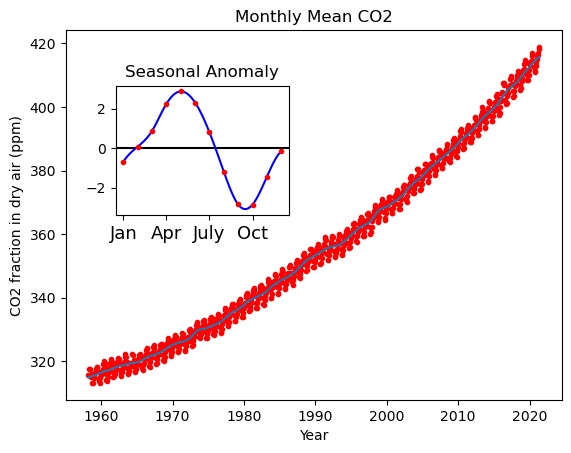

In [20]:
# assign figure and axes to subplots #
fig, ax = plt.subplots()

# plot C02 fraction over dry air #
ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

# graph seasonal anomaly using cubicspline #
axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
axin1.axhline(0, color="black")

c02anomaly = monthly_anomaly.c02
c02anomalyindex = monthly_anomaly.index
splined = CubicSpline(c02anomalyindex, c02anomaly)
linspace = np.linspace(1, 12, 100)

axin1.plot(linspace, splined(linspace), color="b")
axin1.plot(c02anomaly, "r.")
axin1.set_xticks([1, 4, 7, 10])
axin1.set_xticklabels(["Jan", "Apr", "July", "Oct"], size=13)
axin1.set_title("Seasonal Anomaly")